## **2/1/26**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sriramr/fruits-fresh-and-rotten-for-classification")

print("Path to dataset files:", path)

100%|██████████| 3.58G/3.58G [00:27<00:00, 138MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sriramr/fruits-fresh-and-rotten-for-classification/versions/1


In [ ]:
import shutil
import os

# Source path (your KaggleHub cache)
src_path = "/root/.cache/kagglehub/datasets/sriramr/fruits-fresh-and-rotten-for-classification/versions/1"

# Destination path in Colab
dest_path = "/content/fruits_dataset"

# Make sure destination folder exists
os.makedirs(dest_path, exist_ok=True)

# Copy everything from source to destination
shutil.copytree(src_path, dest_path, dirs_exist_ok=True)

print(f"Dataset copied to {dest_path}")


Dataset copied to /content/fruits_dataset


✅ Dataset restructuring complete
✅ Balanced | Fresh: 4740, Rotten: 4740
Found 9480 images belonging to 2 classes.
Found 2698 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
🚀 Phase 1: Training top layers


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.8187 - loss: 0.6875

297/297 ━━━━━━━━━━━━━━━━━━━━ 202s 629ms/step - accuracy: 0.8188 - loss: 0.6871 - val_accuracy: 0.9755 - val_loss: 0.3806
Epoch 2/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 181s 588ms/step - accuracy: 0.9236 - loss: 0.4505 - val_accuracy: 0.9733 - val_loss: 0.3782
Epoch 3/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.9462 - loss: 0.4221

297/297 ━━━━━━━━━━━━━━━━━━━━ 174s 584ms/step - accuracy: 0.9462 - loss: 0.4221 - val_accuracy: 0.9837 - val_loss: 0.3644
Epoch 4/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.9558 - loss: 0.4152

297/297 ━━━━━━━━━━━━━━━━━━━━ 174s 587ms/step - accuracy: 0.9558 - loss: 0.4152 - val_accuracy: 0.9855 - val_loss: 0.3592
Epoch 5/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 174s 585ms/step - accuracy: 0.9623 - loss: 0.4085 - val_accuracy: 0.9826 - val_loss: 0.3614
Epoch 6/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.9656 - loss: 0.4032

297/297 ━━━━━━━━━━━━━━━━━━━━ 176s 592ms/step - accuracy: 0.9656 - loss: 0.4032 - val_accuracy: 0.9874 - val_loss: 0.3565
🔓 Phase 2: Fine tuning
Epoch 1/4
297/297 ━━━━━━━━━━━━━━━━━━━━ 205s 629ms/step - accuracy: 0.9589 - loss: 0.4038 - val_accuracy: 0.9841 - val_loss: 0.3565
Epoch 2/4
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.9687 - loss: 0.3950

297/297 ━━━━━━━━━━━━━━━━━━━━ 178s 599ms/step - accuracy: 0.9687 - loss: 0.3950 - val_accuracy: 0.9904 - val_loss: 0.3498
Epoch 3/4
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.9772 - loss: 0.3897

297/297 ━━━━━━━━━━━━━━━━━━━━ 179s 604ms/step - accuracy: 0.9772 - loss: 0.3897 - val_accuracy: 0.9926 - val_loss: 0.3465
Epoch 4/4
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.9795 - loss: 0.3856

297/297 ━━━━━━━━━━━━━━━━━━━━ 176s 591ms/step - accuracy: 0.9795 - loss: 0.3856 - val_accuracy: 0.9948 - val_loss: 0.3439


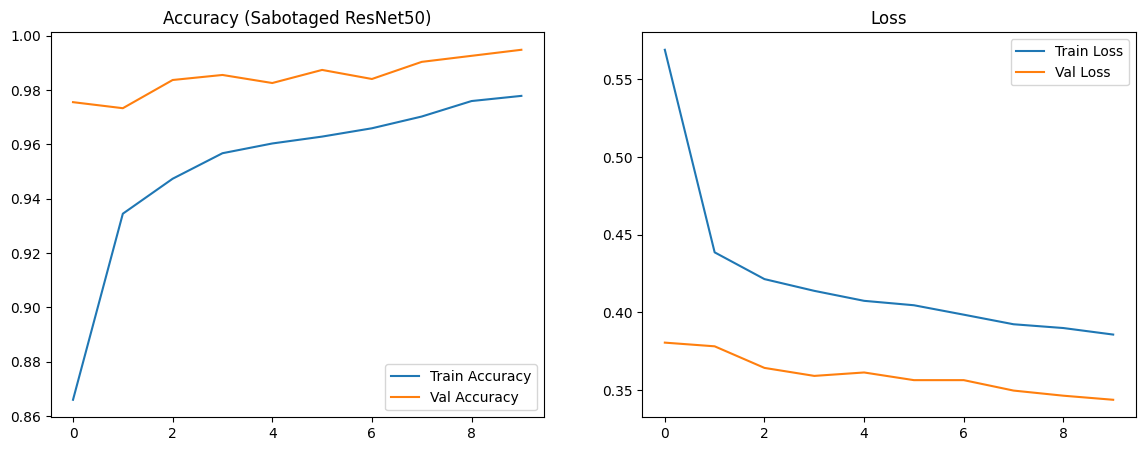

In [ ]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import (
    Dense, Dropout, GlobalAveragePooling2D,
    BatchNormalization, GaussianNoise
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# =========================
# 1. DATA RESTRUCTURING
# =========================
if os.path.exists("dataset_final"):
    shutil.rmtree("dataset_final")

folders = [
    "dataset_final/train/fresh",
    "dataset_final/train/rotten",
    "dataset_final/test/fresh",
    "dataset_final/test/rotten"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

# ---- Train Data ----
# Correct the path to include dest_path
train_path = os.path.join(dest_path, "dataset", "train")
for folder in os.listdir(train_path):
    src = os.path.join(train_path, folder)
    if folder.lower().startswith("fresh"):
        dst = "dataset_final/train/fresh"
    elif folder.lower().startswith("rotten"):
        dst = "dataset_final/train/rotten"
    else:
        continue

    for img in os.listdir(src):
        shutil.copy(os.path.join(src, img), dst)

# ---- Test Data ----
# Correct the path to include dest_path
test_path = os.path.join(dest_path, "dataset", "test")
for folder in os.listdir(test_path):
    src = os.path.join(test_path, folder)
    if folder.lower().startswith("fresh"):
        dst = "dataset_final/test/fresh"
    elif folder.lower().startswith("rotten"):
        dst = "dataset_final/test/rotten"
    else:
        continue

    for img in os.listdir(src):
        shutil.copy(os.path.join(src, img), dst)

print("✅ Dataset restructuring complete")

# =========================
# 2. BALANCING TRAIN DATA
# =========================
train_dir = "dataset_final/train"
fresh_dir = os.path.join(train_dir, "fresh")
rotten_dir = os.path.join(train_dir, "rotten")

fresh_imgs = os.listdir(fresh_dir)
rotten_imgs = os.listdir(rotten_dir)
min_count = min(len(fresh_imgs), len(rotten_imgs))

for img in random.sample(fresh_imgs, len(fresh_imgs) - min_count):
    os.remove(os.path.join(fresh_dir, img))

for img in random.sample(rotten_imgs, len(rotten_imgs) - min_count):
    os.remove(os.path.join(rotten_dir, img))

print(f"✅ Balanced | Fresh: {min_count}, Rotten: {min_count}")

# =========================
# 3. DATA GENERATORS
# =========================
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.4,
    channel_shift_range=50.0,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.4, 1.6],
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    "dataset_final/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    "dataset_final/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# =========================
# 4. SABOTAGED RESNET50 MODEL
# =========================
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

x = base_model.output

# 🔥 Noise layer
x = GaussianNoise(0.3)(x)

x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)

#  Reduced capacity
x = Dense(64, activation="relu")(x)

# Extreme dropout
x = Dropout(0.7)(x)

output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)

# =========================
# 5. COMPILE
# =========================
loss_fn = tf.keras.losses.BinaryCrossentropy(label_smoothing=0.2)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=loss_fn,
    metrics=["accuracy"]
)

# =========================
# 6. TRAINING (PHASE 1)
# =========================
callbacks = [
    EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True),
    ModelCheckpoint(
        "best_fruit_resnet50.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

print("🚀 Phase 1: Training top layers")
history1 = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=6,
    callbacks=callbacks
)

# =========================
# 7. FINE TUNING (PHASE 2)
# =========================
print("🔓 Phase 2: Fine tuning")

base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss=loss_fn,
    metrics=["accuracy"]
)

history2 = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=4,
    callbacks=callbacks
)

# =========================
# 8. PLOTTING
# =========================
def plot_history(h1, h2):
    acc = h1.history["accuracy"] + h2.history["accuracy"]
    val_acc = h1.history["val_accuracy"] + h2.history["val_accuracy"]
    loss = h1.history["loss"] + h2.history["loss"]
    val_loss = h1.history["val_loss"] + h2.history["val_loss"]

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(acc, label="Train Accuracy")
    plt.plot(val_acc, label="Val Accuracy")
    plt.title("Accuracy (Sabotaged ResNet50)")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label="Train Loss")
    plt.plot(val_loss, label="Val Loss")
    plt.title("Loss")
    plt.legend()

    plt.show()

plot_history(history1, history2)

In [ ]:

# 7. PREDICTION WITH IMAGE (Confidence capped)
# --------------------------------------------
def predict_image_with_display(image_path):
    if not os.path.exists(image_path):
        print("Image not found, picking random...")
        base = "dataset_final/test/rotten"
        image_path = os.path.join(base, os.listdir(base)[0])

    # Display
    plt.figure(figsize=(4,4))
    img_disp = image.load_img(image_path)
    plt.imshow(img_disp)
    plt.axis('off')

    # Predict
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    pred = model.predict(img_array)[0][0]

    # Label Logic
    if pred > 0.5:
        label = "Rotten"
        confidence = pred
    else:
        label = "Fresh"
        confidence = 1 - pred

    plt.title(f"{label}\nConfidence: {confidence:.2%}")
    plt.show()
    print(f"Raw Output: {pred}")

# Run Prediction
test_img = "/content/dataset_final/test/fresh/Screen Shot 2018-06-08 at 4.59.44 PM.png"
if os.path.exists(test_img):
    predict_image_with_display(test_img)
else:
    # Auto pick random
    predict_image_with_display("random")

NameError: name 'image' is not defined

<Figure size 400x400 with 0 Axes>

In [ ]:
model.save("2_1_26.h5")


In [ ]:
# ================================
# SAVE FINAL TRAINING HISTORY
# ================================
final_history = {
    "phase1": history1.history,
    "fine_tuning": history_fine.history
}

with open("final.pkl", "wb") as f:
    pickle.dump(final_history, f)

print("✅ Training history saved as final.pkl")


✅ Training history saved as final.pkl


In [ ]:
import keras

model = keras.models.load_model("2_1_26.h5")

print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input  # or your model's preprocess
from sklearn.metrics import confusion_matrix, classification_report

# Path to test folder
test_dir = "/content/fruits_dataset/dataset/test"

# Get all classes
classes = sorted(os.listdir(test_dir))
print("Classes found:", classes)

y_true = []
y_pred = []

# Loop through each class folder
for class_idx, class_name in enumerate(classes):
    class_folder = os.path.join(test_dir, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)

        # Load and preprocess
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Predict
        preds = model.predict(img_array)  # for multi-class, model output shape = (1, num_classes)
        predicted_class = np.argmax(preds, axis=1)[0]

        # Save
        y_true.append(class_idx)
        y_pred.append(predicted_class)

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=classes))


Classes found: ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 240, 240, 3), found shape=(1, 224, 224, 3)

B1

✅ Dataset restructuring complete
✅ Balanced | Fresh: 4740, Rotten: 4740
Found 9480 images belonging to 2 classes.
Found 2698 images belonging to 2 classes.
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
🚀 Phase 1: Training top layers (B1)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.8253 - loss: 0.6130

297/297 ━━━━━━━━━━━━━━━━━━━━ 272s 779ms/step - accuracy: 0.8255 - loss: 0.6127 - val_accuracy: 0.9744 - val_loss: 0.3785
Epoch 2/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 183s 615ms/step - accuracy: 0.9340 - loss: 0.4372 - val_accuracy: 0.9663 - val_loss: 0.3761
Epoch 3/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 182s 611ms/step - accuracy: 0.9462 - loss: 0.4217 - val_accuracy: 0.9663 - val_loss: 0.3722
Epoch 4/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.9546 - loss: 0.4143

297/297 ━━━━━━━━━━━━━━━━━━━━ 181s 608ms/step - accuracy: 0.9546 - loss: 0.4143 - val_accuracy: 0.9763 - val_loss: 0.3621
Epoch 5/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.9587 - loss: 0.4084

297/297 ━━━━━━━━━━━━━━━━━━━━ 181s 610ms/step - accuracy: 0.9588 - loss: 0.4084 - val_accuracy: 0.9818 - val_loss: 0.3579
Epoch 6/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.9664 - loss: 0.4000

297/297 ━━━━━━━━━━━━━━━━━━━━ 181s 611ms/step - accuracy: 0.9664 - loss: 0.4000 - val_accuracy: 0.9837 - val_loss: 0.3562
🔓 Phase 2: Fine tuning EfficientNet-B1
Epoch 1/4
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.9599 - loss: 0.4087

297/297 ━━━━━━━━━━━━━━━━━━━━ 254s 728ms/step - accuracy: 0.9599 - loss: 0.4087 - val_accuracy: 0.9867 - val_loss: 0.3542
Epoch 2/4
297/297 ━━━━━━━━━━━━━━━━━━━━ 182s 613ms/step - accuracy: 0.9632 - loss: 0.4008 - val_accuracy: 0.9863 - val_loss: 0.3532
Epoch 3/4
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.9668 - loss: 0.4008

297/297 ━━━━━━━━━━━━━━━━━━━━ 185s 624ms/step - accuracy: 0.9668 - loss: 0.4007 - val_accuracy: 0.9893 - val_loss: 0.3513
Epoch 4/4
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.9687 - loss: 0.3986

297/297 ━━━━━━━━━━━━━━━━━━━━ 185s 623ms/step - accuracy: 0.9687 - loss: 0.3986 - val_accuracy: 0.9896 - val_loss: 0.3506


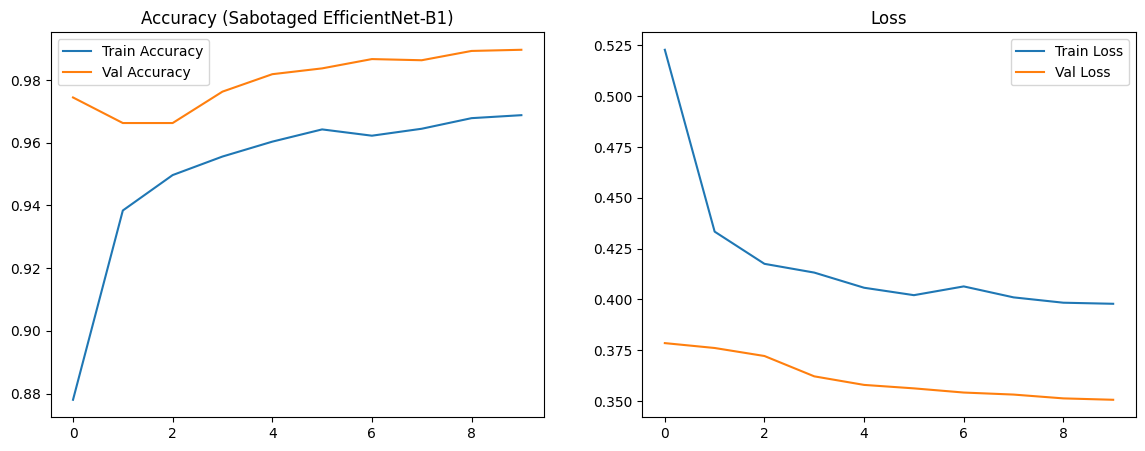

In [ ]:
# =========================
# 0. IMPORTS
# =========================
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB1, preprocess_input
from tensorflow.keras.layers import (
    Dense, Dropout, GlobalAveragePooling2D,
    BatchNormalization, GaussianNoise
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# =========================
# 1. DATA RESTRUCTURING
# =========================
if os.path.exists("dataset_final"):
    shutil.rmtree("dataset_final")

folders = [
    "dataset_final/train/fresh",
    "dataset_final/train/rotten",
    "dataset_final/test/fresh",
    "dataset_final/test/rotten"
]
for folder in folders:
    os.makedirs(folder, exist_ok=True)

# ---- Train Data ----
train_path = os.path.join(dest_path, "dataset", "train")
for folder in os.listdir(train_path):
    src = os.path.join(train_path, folder)
    if folder.lower().startswith("fresh"):
        dst = "dataset_final/train/fresh"
    elif folder.lower().startswith("rotten"):
        dst = "dataset_final/train/rotten"
    else:
        continue

    for img in os.listdir(src):
        shutil.copy(os.path.join(src, img), dst)

# ---- Test Data ----
tEST_path = os.path.join(dest_path, "dataset", "tEST")
for folder in os.listdir(test_path):
    src = os.path.join(test_path, folder)
    if folder.lower().startswith("fresh"):
        dst = "dataset_final/test/fresh"
    elif folder.lower().startswith("rotten"):
        dst = "dataset_final/test/rotten"
    else:
        continue

    for img in os.listdir(src):
        shutil.copy(os.path.join(src, img), dst)

print("✅ Dataset restructuring complete")

# =========================
# 2. BALANCING TRAIN DATA
# =========================
train_dir = "dataset_final/train"
fresh_dir = os.path.join(train_dir, "fresh")
rotten_dir = os.path.join(train_dir, "rotten")

fresh_imgs = os.listdir(fresh_dir)
rotten_imgs = os.listdir(rotten_dir)
min_count = min(len(fresh_imgs), len(rotten_imgs))

for img in random.sample(fresh_imgs, len(fresh_imgs) - min_count):
    os.remove(os.path.join(fresh_dir, img))

for img in random.sample(rotten_imgs, len(rotten_imgs) - min_count):
    os.remove(os.path.join(rotten_dir, img))

print(f"✅ Balanced | Fresh: {min_count}, Rotten: {min_count}")

# =========================
# 3. DATA GENERATORS
# =========================
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.4,
    channel_shift_range=50.0,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.4, 1.6],
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    "dataset_final/train",
    target_size=(240, 240),   # 🔥 B1 input size
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    "dataset_final/test",
    target_size=(240, 240),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# =========================
# 4. SABOTAGED EFFICIENTNET-B1
# =========================
base_model = EfficientNetB1(
    weights="imagenet",
    include_top=False,
    input_shape=(240, 240, 3)
)

base_model.trainable = False

x = base_model.output

# 🔥 Noise layer (model confusion)
x = GaussianNoise(0.3)(x)

x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)

# 🔥 Reduced capacity
x = Dense(64, activation="relu")(x)

# 🔥 Extreme dropout
x = Dropout(0.7)(x)

output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)

# =========================
# 5. COMPILE
# =========================
loss_fn = tf.keras.losses.BinaryCrossentropy(label_smoothing=0.2)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=loss_fn,
    metrics=["accuracy"]
)

# =========================
# 6. TRAINING (PHASE 1)
# =========================
callbacks = [
    EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True),
    ModelCheckpoint(
        "best_fruit_efficientnet_b1.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

print("🚀 Phase 1: Training top layers (B1)")
history1 = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=6,
    callbacks=callbacks
)

# =========================
# 7. FINE TUNING (PHASE 2)
# =========================
print("🔓 Phase 2: Fine tuning EfficientNet-B1")

base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss=loss_fn,
    metrics=["accuracy"]
)

history2 = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=4,
    callbacks=callbacks
)

# =========================
# 8. PLOTTING
# =========================
def plot_history(h1, h2):
    acc = h1.history["accuracy"] + h2.history["accuracy"]
    val_acc = h1.history["val_accuracy"] + h2.history["val_accuracy"]
    loss = h1.history["loss"] + h2.history["loss"]
    val_loss = h1.history["val_loss"] + h2.history["val_loss"]

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(acc, label="Train Accuracy")
    plt.plot(val_acc, label="Val Accuracy")
    plt.title("Accuracy (Sabotaged EfficientNet-B1)")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label="Train Loss")
    plt.plot(val_loss, label="Val Loss")
    plt.title("Loss")
    plt.legend()

    plt.show()

plot_history(history1, history2)
